<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94_%D0%9710_UltraPro%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Numpy_%D0%B8_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Задача 1**

Напишите функцию матричного умножения трёх матриц без использования встроенных средств np.dot(), @.

In [ ]:
import numpy as np
matrix1 = np.random.randint(0, 12, (5,3))
matrix2 = np.random.randint(12, 24, (3,5))
matrix3 = np.random.randint(24, 46, (5,2))

In [ ]:
# Функция матричного умножения, принимающая на вход 2 матрицы
def prod_matrix(matrix1, matrix2):
    shape1 = matrix1.shape                # Размерность первой матрицы
    shape2 = matrix2.shape                # Размерность второй матрицы
    # Если количество столбцов первой матрицы не равно количеству строк второй матрицы
    if (shape1[1] != shape2[0]):
        return np.array([])               # Возвращаем пустой массив

    # Создание матрицы из 0, размерности (количество строк первой) x (количество столбцов второй) матриц
    out_matrix = np.zeros((shape1[0], shape2[1]))

    for i in range(shape1[0]):            # Для индексов строк первой матрицы
        for j in range(shape2[1]):        # Для индексов столбцов второй матрицы
            for t in range(shape1[1]):    # Для индексов стобцов первой матрицы
                # Подсчет суммы произведения элементов строки первой матрицы и столбцов второй матрицы
                out_matrix[i, j] += matrix1[i,t] * matrix2[t,j]

    return out_matrix

# Функция перемножения трех матриц
def prod_matrix_3(matrix1, matrix2, matrix3):
    # Перемножение матриц слева направо
    return prod_matrix(prod_matrix(matrix1, matrix2), matrix3)

In [ ]:
# Вывод трех матриц и их произведения
print(matrix1,'\n')
print(matrix2,'\n')
print(matrix3,'\n')
print(prod_matrix_3(matrix1, matrix2, matrix3))

[[9 3 9]
 [4 4 9]
 [0 9 1]
 [1 7 1]
 [1 6 4]] 

[[14 23 17 21 23]
 [13 18 21 15 17]
 [19 14 17 14 23]] 

[[45 43]
 [38 29]
 [45 39]
 [29 38]
 [36 32]] 

[[73611. 68622.]
 [58342. 54306.]
 [32735. 30280.]
 [29919. 27718.]
 [36816. 34166.]]


# **Задача 2**

Нужно вывести на печать матрицу размером N*N, заполненную числами натурального ряда, начиная с первого элемента и двигаясь по спирали:

В зависимости от введенных данных результат может выглядеть так:

Размерность квадратной матрицы :

1  2  3  4  5  6

20 21 22 23 24 7

19 32 33 34 25 8

18 31 36 35 26 9

17 30 29 28 27 10

16 15 14 13 12 11

**Вариант решения 1**

In [ ]:
# Запрос размерности матрицы n x n
n = int(input("Размерность квадратной матрицы: "))
# Результирующая матрица
mat = [[0]*n for i in range(n)]
# st - текущее значение-счетчик для записи в матрицу
# m - коеффициент, используемый для заполнения верхней
# матрицы последующих витков, т.к. одномерные матрицы
# следующих витков имеют меньше значений
st, m = 1, 0
# Определение центрального элемента матрицы
mat[n//2][n//2]=n*n
for v in range(n//2):
    # Заполнение верхней горизонтали матрицы
    for i in range(n-m):
        mat[v][i+v] = st
        st+=1
    # Заполнение правой вертикали матрицы
    for i in range(v+1, n-v):
        mat[i][-v-1] = st
        st+=1
    # Заполнение нижней горизонтали матрицы
    for i in range(v+1, n-v):
        mat[-v-1][-i-1] =st
        st+=1
    # Заполнение левой вертикали матрицы
    for i in range(v+1, n-(v+1)):
        mat[-i-1][v]=st
        st+=1
    m+=2
# Вывод результата на экран
for i in mat:
    print(*i)

Размерность квадратной матрицы: 6
1 2 3 4 5 6
20 21 22 23 24 7
19 32 33 34 25 8
18 31 36 35 26 9
17 30 29 28 27 10
16 15 14 13 12 11


**Вариант решения 2**

In [ ]:
import numpy as np
N = int(input("Размерность квадратной матрицы: "))
a = [None] * N * N
dirs = (1, N, -1, -N)
dir = 0
addr = 0
for i in range(N * N):
	a[addr] = i + 1
	if addr == N-1 or addr == N*N-1 or addr == N*N-N or a[addr + dirs[dir]] != None:
		dir = (dir + 1) & 3
	addr += dirs[dir]

for y in range(N):
	print(a[y * N : y * N + N])

Размерность квадратной матрицы: 5
[1, 2, 3, 4, 5]
[16, 17, 18, 19, 6]
[15, 24, 25, 20, 7]
[14, 23, 22, 21, 8]
[13, 12, 11, 10, 9]


Ссылка на контент:

https://dzen.ru/a/X10dF9cJJHMXCDI3?share_to=link

:-)

# **Задача 3**

Используя библиотеку numpy найдите количество будних дней в феврале 2015 года.

Ваш результат может выглядеть так:

Количество будних дней в феврале 2015 года:

20


In [ ]:
print("Количество будних дней в феврале 2015 года: ")
print(np.busday_count('2015-02', '2015-03'))

Количество будних дней в феврале 2015 года: 
20


# **Задача 4**

Создайте гистограмму, содержащую различные варианты текстур.

In [ ]:
import matplotlib.pyplot as plt

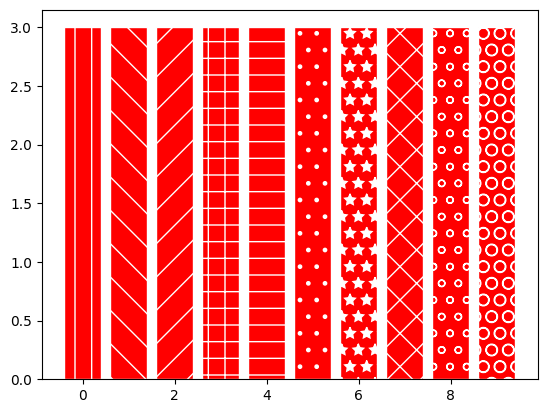

In [ ]:
# Создание графика
fig = plt.figure()
# Варианты текстур
patterns = [ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]
# Разделение на области
ax = fig.add_subplot(111)
# Перебор текстур
for i in range(len(patterns)):
    # Отрисовка гистограммы
    ax.bar(i, 3, color='red', edgecolor='white', hatch=patterns[i])
plt.show()

Задача 5

Постройте точечную диаграмму с использованием случайных распределений для создания шариков разных размеров.

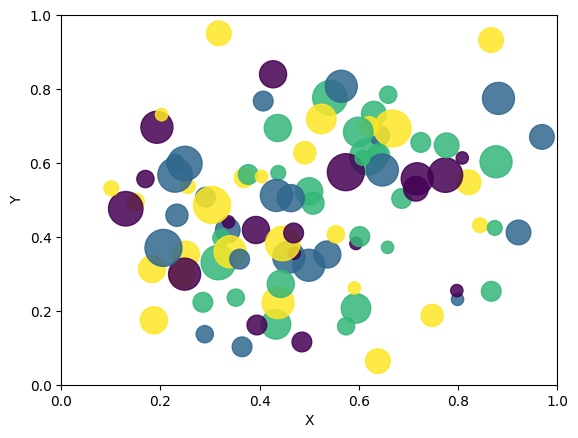

In [ ]:
import math
import random
# Количество шариков
no_of_balls = 100
# Значения по оси Х с плавающей точкой
x = [random.triangular() for i in range(no_of_balls)]
# Значения по оси Y, случайные числа на основе распределения Гаусса
y = [random.gauss(0.5, 0.25) for i in range(no_of_balls)]
# Цвета кругов
colors = [random.randint(1, 4) for i in range(no_of_balls)]
# Генерация кругов
areas = [math.pi * random.randint(5, 15)**2 for i in range(no_of_balls)]
# Отрисовка графика
plt.figure()
# Создание точечного графика
plt.scatter(x, y, s=areas, c=colors, alpha=0.85)
# Значения осей
plt.axis([0.0, 1.0, 0.0, 1.0])
# Подписи осей
plt.xlabel("X")
plt.ylabel("Y")
plt.show()